In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
def plt_show_color(image):
    b, g, r = cv2.split(image)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()
def plt_show_gray(image):
    plt.imshow(image, cmap='gray')
    plt.show()

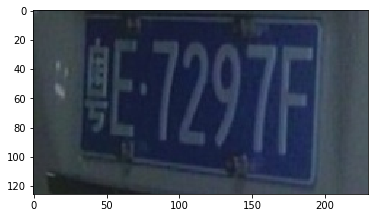

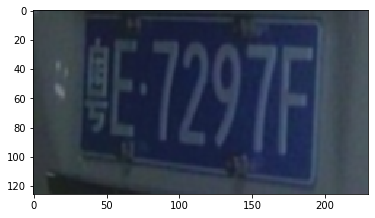

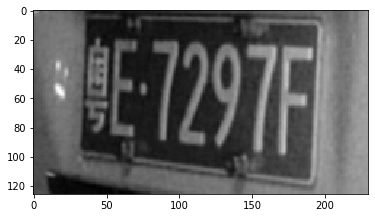

In [2]:
# 加载图片
src = cv2.imread('C:\\Users\\15098\\Desktop\\153201092551_0.jpg')
plt_show_color(src)
# 高斯去噪
image = cv2.GaussianBlur(src, (3, 3), 0)
plt_show_color(image)
# 灰度处理
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show_gray(gray)

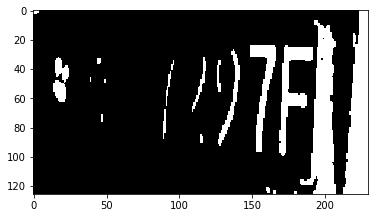

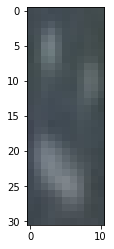

[14, 32, 11, 31]
80


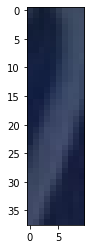

[109, 32, 10, 38]
80


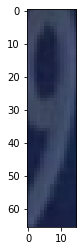

[127, 27, 15, 66]
80


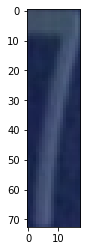

[149, 24, 18, 73]
80


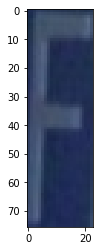

[169, 24, 23, 76]
80


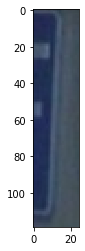

[183, 7, 25, 119]
80


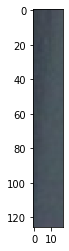

[213, 0, 17, 126]
80


In [3]:
# 自适应阈值处理
for i in range(255,5,-5):
#     ret, image = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU |cv2.THRESH_BINARY)
    ret, binary = cv2.threshold(gray, i, 255, cv2.THRESH_BINARY)

#     plt_show_gray(image)
#     plt_show_gray(binary)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    binary = cv2.dilate(binary, kernel)
#     plt_show_gray(binary)
    
    # 轮廓检测
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    imagel = src.copy()
    cv2.drawContours(imagel, contours, -1, (0, 0, 255), 1)
#     plt_show_color(imagel)
    
    
    # 筛选出各个字符的位置的轮廓
    words = []
    for item in contours:
        word = []
        rect = cv2.boundingRect(item)
        x = rect[0]
        y = rect[1]
        weight = rect[2]
        height = rect[3]
        word.append(x)
        word.append(y)
        word.append(weight)
        word.append(height)
        words.append(word)

    words = sorted(words, key = lambda s:s[0], reverse = False)
    
#     print(words)
    word2 = []
    for word in words:# 3-长  2-宽 1-起点的很横坐标  0-纵
        if(word[3] > (word[2] * 1.5)) and (word[3] < (word[2] * 9)) and word[2]*word[3]>200:
            word2.append(word)
            image = src[word[1]:word[1]+word[3], word[0]:word[0]+word[2]]
#             plt_show_color(image)
#     if word2[0][3]<word2[0][2]*1.5:
#         del wor2[0]
    if len(word2)==7:
        plt_show_gray(binary)
        for word in word2:
            image = src[word[1]:word[1]+word[3], word[0]:word[0]+word[2]]
            plt_show_color(image)
            print(word)
            print(i)
        break